In [1]:
import numpy as np
import pandas as pd

import anndata as ad
import scanpy as sc
import squidpy as sq

sc.logging.print_header()
print(f"squidpy=={sq.__version__}")

# load the pre-processed dataset
img = sq.datasets.visium_hne_image()
adata = sq.datasets.visium_hne_adata()

/home/mowp/mambaforge/envs/st/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/home/mowp/mambaforge/envs/st/lib/python3.10/site-packages/spatialdata/__init__.py:9: UserWarning: Geopandas was set to use PyGEOS, changing to shapely 2.0 with:

	geopandas.options.use_pygeos = True

If you intended to use PyGEOS, set the option to False.
  _check_geopandas_using_shapely()
/home/mowp/mambaforge/envs/st/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-u

scanpy==1.9.5 anndata==0.9.2 umap==0.5.3 numpy==1.23.4 scipy==1.11.1 pandas==2.0.3 scikit-learn==1.3.0 statsmodels==0.14.0 igraph==0.10.8 louvain==0.8.1 pynndescent==0.5.10
squidpy==1.3.0


In [2]:
import matplotlib.pyplot as plt

In [3]:
adata

AnnData object with n_obs × n_vars = 2688 × 18078
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_counts', 'leiden', 'cluster'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'cluster_colors', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'spatial', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

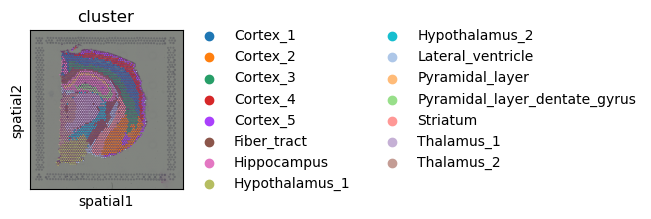

In [4]:
sq.pl.spatial_scatter(adata, color="cluster")

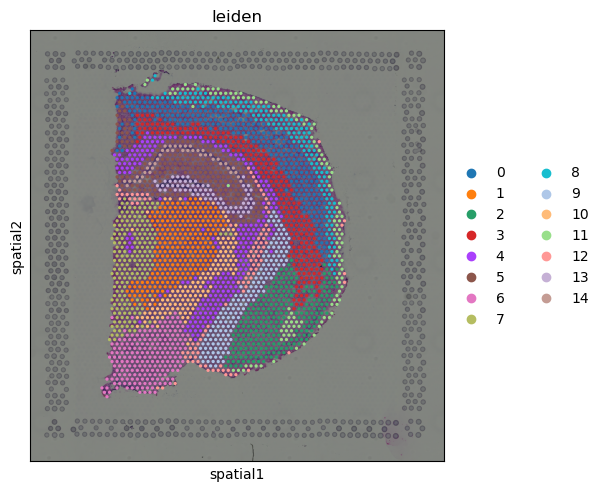

In [21]:
sq.pl.spatial_scatter(adata, color="leiden")

In [3]:
img

ImageContainer[shape=(11757, 11291), layers=['image']]

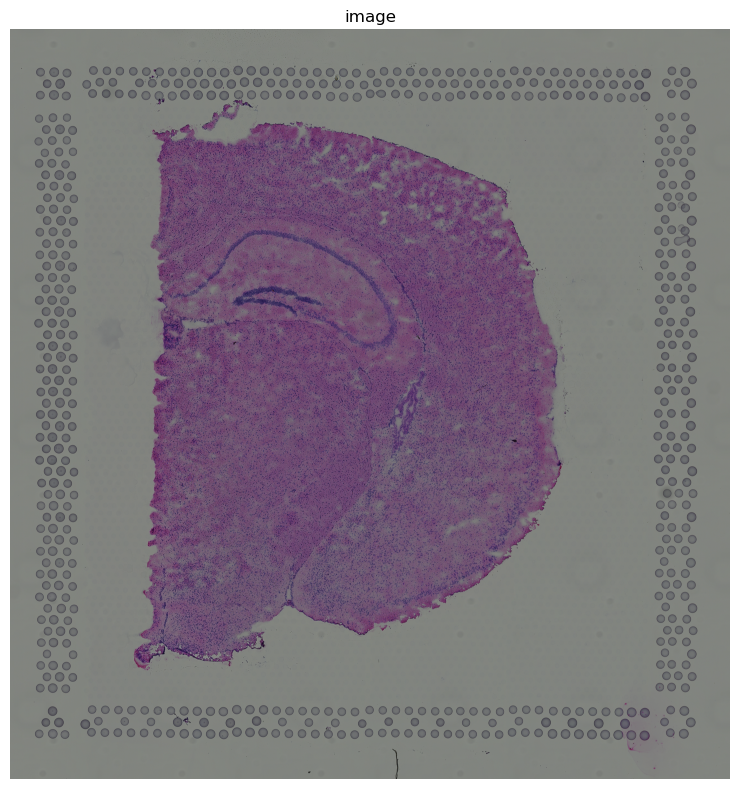

In [4]:
img.show()

# Image features

In [22]:
# calculate features for different scales (higher value means more context)
for scale in [1.0, 2.0]:
    feature_name = f"features_summary_scale{scale}"
    sq.im.calculate_image_features(
        adata,
        img.compute(),
        features="summary",
        key_added=feature_name,
        n_jobs=32,
        scale=scale,
    )


# combine features in one dataframe
adata.obsm["features"] = pd.concat(
    [adata.obsm[f] for f in adata.obsm.keys() if "features_summary" in f],
    axis="columns",
)
# make sure that we have no duplicated feature names in the combined table
adata.obsm["features"].columns = ad.utils.make_index_unique(
    adata.obsm["features"].columns
)

100%|██████████| 2688/2688 [00:05<00:00, 459.34/s]


In [25]:
adata

AnnData object with n_obs × n_vars = 2688 × 18078
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_counts', 'leiden', 'cluster'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'cluster_colors', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'spatial', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial', 'features_summary_scale1.0', 'features_summary_scale2.0', 'features'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [30]:
# the img is store in adata.uns['spatial']
adata.uns['spatial'].keys()

dict_keys(['V1_Adult_Mouse_Brain'])

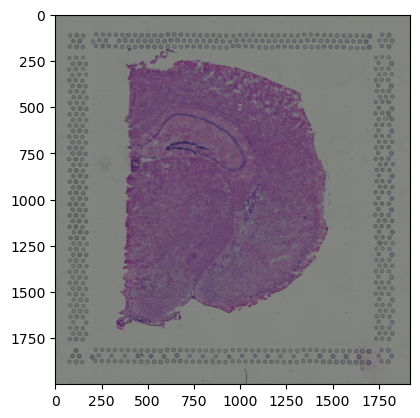

In [33]:
plt.imshow(adata.uns['spatial']['V1_Adult_Mouse_Brain']['images']['hires'])

In [26]:
adata.obsm['features']

,summary_ch-0_quantile-0.9,summary_ch-0_quantile-0.5,summary_ch-0_quantile-0.1,summary_ch-0_mean,summary_ch-0_std,summary_ch-1_quantile-0.9,summary_ch-1_quantile-0.5,summary_ch-1_quantile-0.1,summary_ch-1_mean,summary_ch-1_std,...,summary_ch-1_quantile-0.9-1,summary_ch-1_quantile-0.5-1,summary_ch-1_quantile-0.1-1,summary_ch-1_mean-1,summary_ch-1_std-1,summary_ch-2_quantile-0.9-1,summary_ch-2_quantile-0.5-1,summary_ch-2_quantile-0.1-1,summary_ch-2_mean-1,summary_ch-2_std-1
AAACAAGTATCTCCCA-1,132.0,111.0,77.0,107.571140,21.767668,102.0,79.0,54.0,78.586668,19.153915,...,99.0,79.0,56.0,78.123248,17.307853,134.0,112.0,90.0,111.994919,17.550044
AAACAATCTACTAGCA-1,140.0,111.0,80.0,109.815175,25.047208,87.0,60.0,39.0,61.846105,19.495044,...,85.0,60.0,39.0,61.372806,18.517388,133.0,108.0,85.0,108.325969,18.951807
AAACACCAATAACTGC-1,132.0,116.0,89.0,112.421285,19.088559,109.0,91.0,67.0,89.382780,16.884106,...,108.0,90.0,68.0,88.907493,16.411915,129.0,116.0,98.0,114.225193,13.425479
AAACAGAGCGACTCCT-1,136.0,116.0,93.0,115.085217,17.450778,115.0,82.0,58.0,84.919202,22.004344,...,114.0,82.0,60.0,84.458654,20.596870,133.0,113.0,91.0,112.717776,16.685592
AAACCGGGTAGGTACC-1,137.0,112.0,83.0,110.426840,21.210674,103.0,78.0,54.0,78.434920,19.046626,...,102.0,78.0,55.0,77.971342,18.140652,132.0,113.0,93.0,112.406641,15.151956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGTTGTGTGTCAAGA-1,135.0,107.0,45.0,98.505365,33.255413,104.0,74.0,33.0,71.122964,26.024651,...,101.0,74.0,34.0,70.653421,24.716731,140.0,111.0,75.0,109.125710,24.864237
TTGTTTCACATCCAGG-1,139.0,107.0,64.0,104.259942,28.099418,112.0,81.0,49.0,80.879687,24.025899,...,110.0,80.0,50.0,80.408945,22.981237,138.0,113.0,85.0,112.121576,20.841642
TTGTTTCATTAGTCTA-1,135.0,111.0,73.0,107.579220,24.471029,107.0,81.0,54.0,80.455372,20.784933,...,105.0,81.0,54.0,79.989774,19.979603,133.0,113.0,89.0,111.993183,17.442640
TTGTTTCCATACAACT-1,136.0,110.0,77.0,107.720490,23.502833,99.0,73.0,49.0,73.409923,19.286326,...,97.0,73.0,49.0,72.940759,18.380322,132.0,111.0,89.0,110.416835,17.267120


We can use the extracted image features to compute a new cluster annotation. This could be useful to gain insights in similarities across spots based on image morphology.

We can use the extracted image features to compute a new cluster annotation. This could be useful to gain insights in similarities across spots based on image morphology.

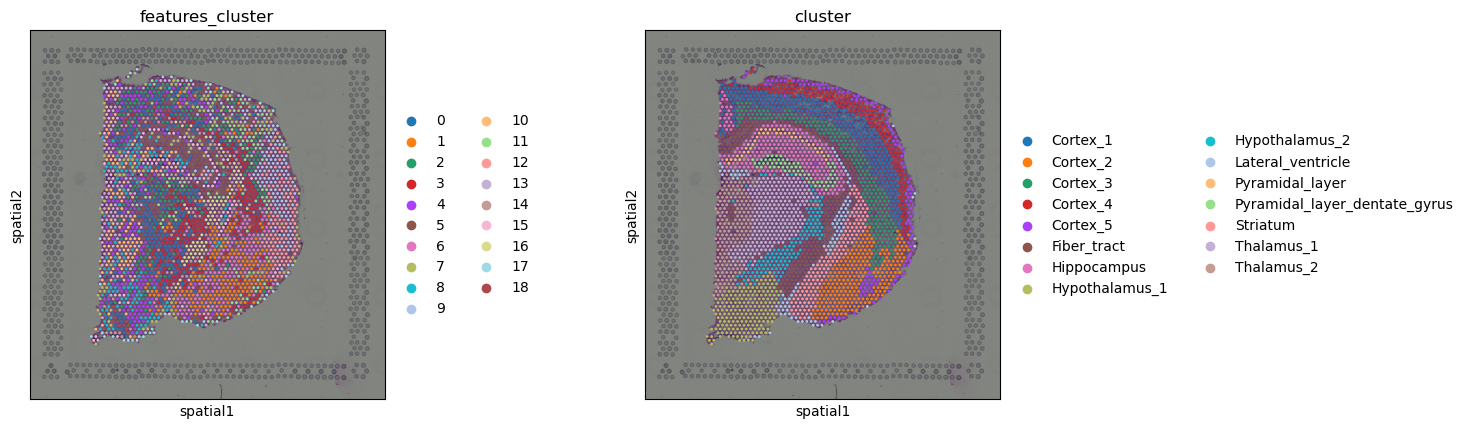

In [27]:
# helper function returning a clustering
def cluster_features(features: pd.DataFrame, like=None) -> pd.Series:
    """
    Calculate leiden clustering of features.

    Specify filter of features using `like`.
    """
    # filter features
    if like is not None:
        features = features.filter(like=like)
    # create temporary adata to calculate the clustering
    adata = ad.AnnData(features)
    # important - feature values are not scaled, so need to scale them before PCA
    sc.pp.scale(adata)
    # calculate leiden clustering
    sc.pp.pca(adata, n_comps=min(10, features.shape[1] - 1))
    sc.pp.neighbors(adata)
    sc.tl.leiden(adata)

    return adata.obs["leiden"]


# calculate feature clusters
adata.obs["features_cluster"] = cluster_features(adata.obsm["features"], like="summary")

# compare feature and gene clusters
sq.pl.spatial_scatter(adata, color=["features_cluster", "cluster"])

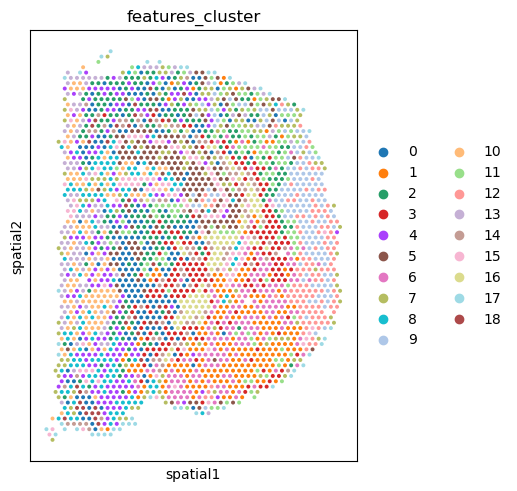

In [29]:
sq.pl.spatial_scatter(adata, color=["features_cluster"], img=False)

# Spatial statistics and graph analysis

100%|██████████| 1000/1000 [00:00<00:00, 1737.67/s]


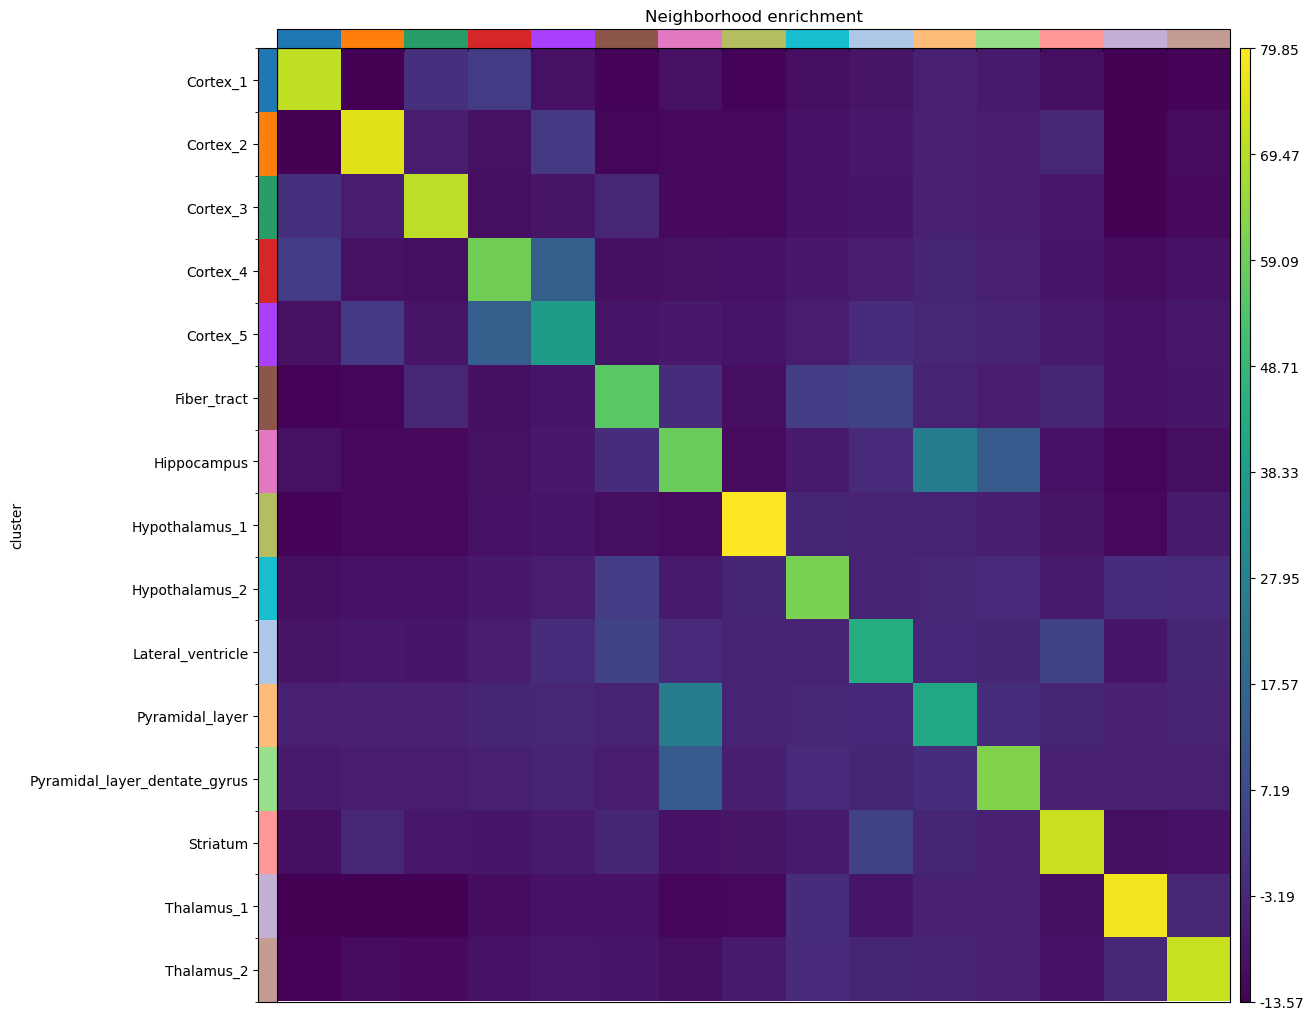

In [14]:
# Neighborhood enrichment

sq.gr.spatial_neighbors(adata)  # 构建近邻图
sq.gr.nhood_enrichment(adata, cluster_key="cluster")  # 计算分数
sq.pl.nhood_enrichment(adata, cluster_key="cluster")

# Co-occurrence across spatial dimensions

100%|██████████| 1/1 [00:01<00:00,  1.13s/]


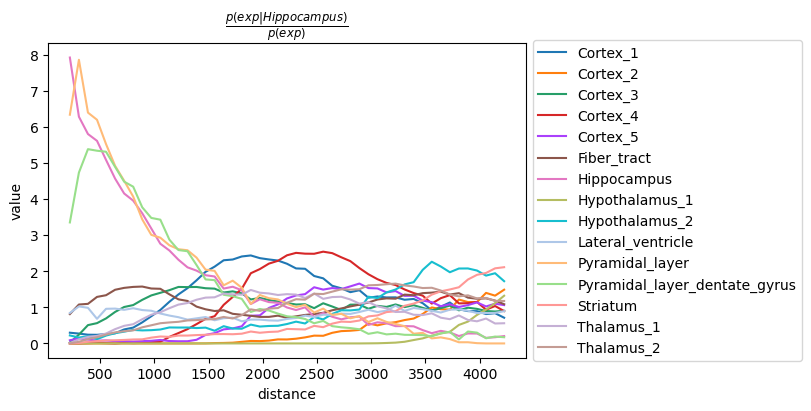

In [6]:
sq.gr.co_occurrence(adata, cluster_key="cluster")
sq.pl.co_occurrence(
    adata,
    cluster_key="cluster",
    clusters="Hippocampus",
    figsize=(8, 4),
)

# Ligand-receptor interaction analysis

In Squidpy, we provide a fast re-implementation the popular method CellPhoneDB [Efremova et al., 2020] (code <https://github.com/Teichlab/cellphonedb>_ ) and extended its database of annotated ligand-receptor interaction pairs with the popular database Omnipath [Türei et al., 2016]

 We’ll also subset the visualization for only one source group, the Hippocampus cluster, and two target groups, Pyramidal_layer_dentate_gyrus and Pyramidal_layer cluster.

In [4]:
sq.gr.ligrec(
    adata,
    n_perms=100,
    cluster_key="cluster",
)

100%|██████████| 100/100 [00:48<00:00,  2.07permutation/s]


In [5]:
adata.uns['cluster_ligrec']['means']

cluster_1       Cortex_1                                                      \
cluster_2       Cortex_1  Cortex_2  Cortex_3  Cortex_4  Cortex_5 Fiber_tract   
source  target                                                                 
EPOR    TRPC3   0.315141  0.150374  0.244891  0.190613  0.107422    0.101848   
        JAK2    0.309859  0.432475  0.404728  0.400979  0.196569    0.329724   
FYN     JAK2    1.341549  1.464165  1.436418  1.432669  1.228259    1.361414   
CCL2    JAK2    0.242958  0.365574  0.337826  0.334078  0.129668    0.262823   
KIT     JAK2    0.419014  0.541630  0.513882  0.510134  0.305724    0.438879   
...                  ...       ...       ...       ...       ...         ...   
GLS     GRIN2D  3.394366  3.404155  3.376703  3.379552  3.273624    3.262511   
SLC17A8 GRIN2D  0.223592  0.233381  0.205928  0.208777  0.102850    0.091736   
SLC1A1  GRIN2D  1.128521  1.138310  1.110858  1.113707  1.007779    0.996666   
SLC1A6  GRIN2D  0.290493  0.300282  0.272830  0.275678  0.169751    0.158638   
GLS2    GRIN2D  0.390845  0.400634  0.373182  0.376031  0.270103    0.258990   

cluster_1                                                                   \
cluster_2      Hippocampus Hypothalamus_1 Hypothalamus_2 Lateral_ventricle   
source  target                                                               
EPOR    TRPC3     0.084428       0.133566       0.147609          0.130567   
        JAK2      0.199293       0.410008       0.354376          0.406757   
FYN     JAK2      1.230983       1.441698       1.386066          1.438447   
CCL2    JAK2      0.132391       0.343107       0.287475          0.339856   
KIT     JAK2      0.308448       0.519163       0.463531          0.515912   
...                    ...            ...            ...               ...   
GLS     GRIN2D    3.290176       3.606920       3.580496          3.374732   
SLC17A8 GRIN2D    0.119401       0.436146       0.409721          0.203957   
SLC1A1  GRIN2D    1.024331       1.341075       1.314651          1.108887   
SLC1A6  GRIN2D    0.186302       0.503047       0.476623          0.270858   
GLS2    GRIN2D    0.286655       0.603399       0.576975          0.371211   

cluster_1       ...  Thalamus_2                                            \
cluster_2       ... Fiber_tract Hippocampus Hypothalamus_1 Hypothalamus_2   
source  target  ...                                                         
EPOR    TRPC3   ...    0.095686    0.078266       0.127404       0.141447   
        JAK2    ...    0.323562    0.193131       0.403846       0.348214   
FYN     JAK2    ...    1.706374    1.575943       1.786659       1.731027   
CCL2    JAK2    ...    0.263666    0.133235       0.343950       0.288318   
KIT     JAK2    ...    0.302729    0.172297       0.383013       0.327381   
...             ...         ...         ...            ...            ...   
GLS     GRIN2D  ...    2.058836    2.086501       2.403245       2.376821   
SLC17A8 GRIN2D  ...    0.155190    0.182855       0.499599       0.473175   
SLC1A1  GRIN2D  ...    0.592690    0.620355       0.937099       0.910675   
SLC1A6  GRIN2D  ...    0.230711    0.258376       0.575120       0.548696   
GLS2    GRIN2D  ...    0.186440    0.214105       0.530849       0.504425   

cluster_1                                         \
cluster_2      Lateral_ventricle Pyramidal_layer   
source  target                                     
EPOR    TRPC3           0.124405        0.169643   
        JAK2            0.400595        0.788690   
FYN     JAK2            1.783408        2.171503   
CCL2    JAK2            0.340699        0.728795   
KIT     JAK2            0.379762        0.767857   
...                          ...             ...   
GLS     GRIN2D          2.171057        2.356771   
SLC17A8 GRIN2D          0.267411        0.453125   
SLC1A1  GRIN2D          0.704911        0.890625   
SLC1A6  GRIN2D          0.342932        0.528646   
GLS2    GRIN2D          0.29866

In [6]:
adata.uns['cluster_ligrec']['pvalues']

cluster_1      Cortex_1                                                  \
cluster_2      Cortex_1 Cortex_2 Cortex_3 Cortex_4 Cortex_5 Fiber_tract   
source  target                                                            
EPOR    TRPC3      0.00     0.99     0.00     0.55     1.00        1.00   
        JAK2       0.96     0.00     0.05     0.03     1.00        0.83   
FYN     JAK2       1.00     0.73     0.82     0.86     1.00        1.00   
CCL2    JAK2        NaN      NaN      NaN      NaN      NaN         NaN   
KIT     JAK2       0.96     0.04     0.19     0.23     1.00        0.88   
...                 ...      ...      ...      ...      ...         ...   
GLS     GRIN2D     0.00     0.00     0.00     0.00     0.00        0.00   
SLC17A8 GRIN2D     0.82     0.75     0.97     0.90     1.00        1.00   
SLC1A1  GRIN2D     0.09     0.06     0.15     0.12     0.68        0.85   
SLC1A6  GRIN2D     1.00     1.00     1.00     1.00     1.00        1.00   
GLS2    GRIN2D     0.13     0.06     0.39     0.25     1.00        1.00   

cluster_1                                                                   \
cluster_2      Hippocampus Hypothalamus_1 Hypothalamus_2 Lateral_ventricle   
source  target                                                               
EPOR    TRPC3         1.00           0.99           0.91              0.99   
        JAK2          1.00           0.03           0.57              0.10   
FYN     JAK2          1.00           0.87           0.96              0.86   
CCL2    JAK2           NaN            NaN            NaN               NaN   
KIT     JAK2          1.00           0.18           0.65              0.18   
...                    ...            ...            ...               ...   
GLS     GRIN2D        0.00           0.00           0.00              0.00   
SLC17A8 GRIN2D        1.00           0.00           0.00              0.89   
SLC1A1  GRIN2D        0.66           0.00           0.00              0.17   
SLC1A6  GRIN2D        1.00           0.00           0.00              1.00   
GLS2    GRIN2D        1.00           0.00           0.00              0.32   

cluster_1       ...  Thalamus_2                                            \
cluster_2       ... Fiber_tract Hippocampus Hypothalamus_1 Hypothalamus_2   
source  target  ...                                                         
EPOR    TRPC3   ...        1.00        1.00           1.00           0.96   
        JAK2    ...        0.90        1.00           0.09           0.61   
FYN     JAK2    ...        0.04        0.29           0.00           0.03   
CCL2    JAK2    ...         NaN         NaN            NaN            NaN   
KIT     JAK2    ...        1.00        1.00           1.00           1.00   
...             ...         ...         ...            ...            ...   
GLS     GRIN2D  ...        0.99        0.99           0.58           0.67   
SLC17A8 GRIN2D  ...        1.00        1.00           0.00           0.00   
SLC1A1  GRIN2D  ...        1.00        1.00           0.97           0.97   
SLC1A6  GRIN2D  ...        1.00        1.00           0.00           0.00   
GLS2    GRIN2D  ...        1.00        1.00           0.00           0.00   

cluster_1                                         \
cluster_2      Lateral_ventricle Pyramidal_layer   
source  target                                     
EPOR    TRPC3               0.99            0.66   
        JAK2                0.11            0.00   
FYN     JAK2                0.01            0.00   
CCL2    JAK2                 NaN             NaN   
KIT     JAK2                0.99            0.00   
...                          ...             ...   
GLS     GRIN2D              0.98            0.68   
SLC17A8 GRIN2D              0.23            0.00   
SLC1A1  GRIN2D              1.00            0.98   
SLC1A6  GRIN2D              0.80            0.02   
GLS2    GRIN2D              0.96            0.05   

cluster_1                                       

/home/mowp/mambaforge/envs/st/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:748: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


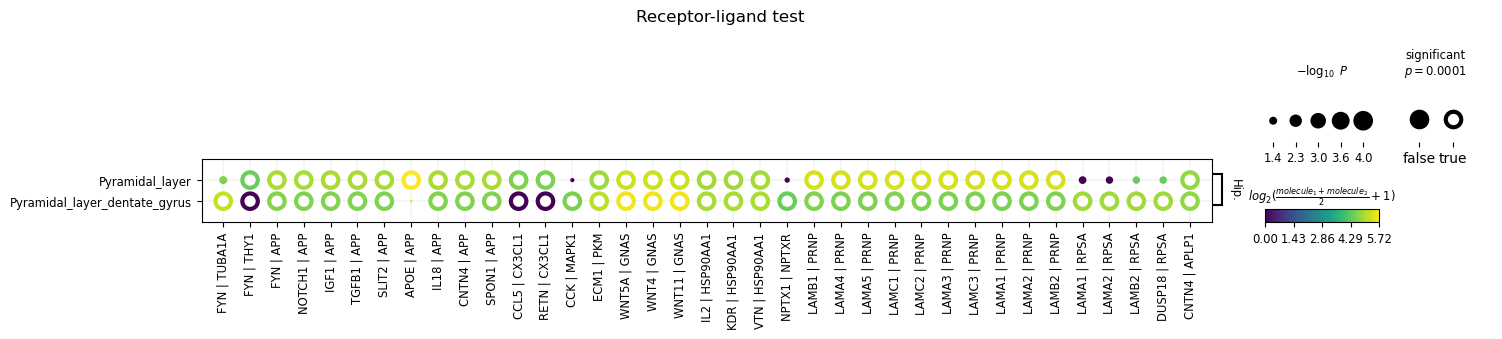

In [12]:
sq.pl.ligrec(
    adata,
    cluster_key="cluster",
    source_groups="Hippocampus",
    target_groups=["Pyramidal_layer", "Pyramidal_layer_dentate_gyrus"],
    means_range=(20, np.inf),  # Only show interactions whose means are within this
    alpha=1e-4,
    swap_axes=True,
    remove_empty_interactions=True,
    remove_nonsig_interactions=True,
)

The dotplot visualization provides an interesting set of candidate ligand-receptor annotation that could be involved in cellular interactions in the Hippocampus.

# Spatially variable genes with Moran’s I

The function in Squidpy is called squidpy.gr.spatial_autocorr(), and returns both test statistics and adjusted p-values in anndata.AnnData.var slot. For time reasons, we will evaluate a subset of the highly variable genes only.

In [15]:
#  run `squidpy.gr.spatial_neighbors(..., key_added='spatial')` first.

genes = adata[:, adata.var.highly_variable].var_names.values[:1000]
sq.gr.spatial_autocorr(
    adata,
    mode="moran",
    genes=genes,
    n_perms=100,
    n_jobs=32,
)

  0%|          | 0/100 [00:00<?, ?/s]/home/mowp/mambaforge/envs/st/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/home/mowp/mambaforge/envs/st/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/home/mowp/mambaforge/envs/st/lib/python3.10/site-packages/spatialdata/__init__.py:9: UserWarning: Geopandas was set to use PyGEOS, changing to shapely 2.0 with:

	geopandas.options.use_pygeos = True

If you intended to use PyGEOS, set the option to False.
  _check_geopandas_using_shapely()
/home/mowp/mambaforge/envs/st/lib/python3.10/site-packages/spatialdata/__init__.py:9: UserWarning: Ge

In [16]:
adata.uns["moranI"].head(10)

,I,pval_norm,var_norm,pval_z_sim,pval_sim,var_sim,pval_norm_fdr_bh,pval_z_sim_fdr_bh,pval_sim_fdr_bh
Olfm1,0.763291,0.0,0.000131,0.0,0.009901,0.000231,0.0,0.0,0.011662
Plp1,0.747660,0.0,0.000131,0.0,0.009901,0.000280,0.0,0.0,0.011662
Itpka,0.727076,0.0,0.000131,0.0,0.009901,0.000306,0.0,0.0,0.011662
Snap25,0.720987,0.0,0.000131,0.0,0.009901,0.000208,0.0,0.0,0.011662
Nnat,0.708637,0.0,0.000131,0.0,0.009901,0.000214,0.0,0.0,0.011662
Ppp3ca,0.693320,0.0,0.000131,0.0,0.009901,0.000238,0.0,0.0,0.011662
Chn1,0.684957,0.0,0.000131,0.0,0.009901,0.000210,0.0,0.0,0.011662
Mal,0.679775,0.0,0.000131,0.0,0.009901,0.000255,0.0,0.0,0.011662
Tmsb4x,0.676719,0.0,0.000131,0.0,0.009901,0.000286,0.0,0.0,0.011662
Cldn11,0.674110,0.0,0.000131,0.0,0.009901,0.000279,0.0,0.0,0.011662


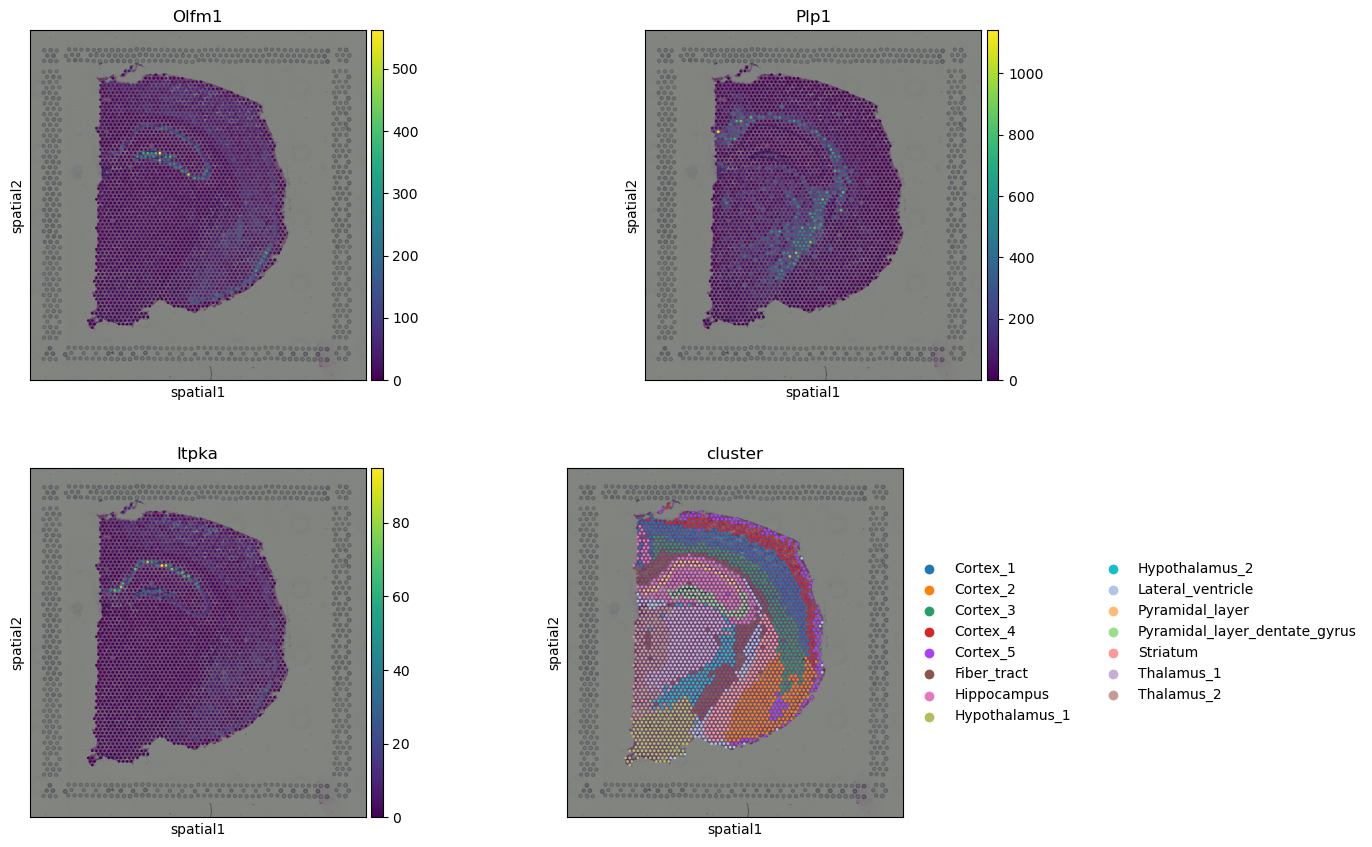

In [18]:
sq.pl.spatial_scatter(adata, color=["Olfm1", "Plp1", "Itpka", "cluster"], ncols=2)

some of these genes seems to be related to the pyramidal layers and the fiber tract.